In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers # Prevents overfitting
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob # search for files recursively in a directory.
import numpy as np
import cv2
import os


# Used to supress the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
folder_path = r"C:\Users\Prathamesh\Downloads\archive(12)\data"
cloudy_images = os.listdir(folder_path + '/cloudy/')#retrieves the filenames of the images in the "cloudy" subdirectory.
desert_images = os.listdir(folder_path + '/desert/')
green_area_images = os.listdir(folder_path + '/green_area/')
water_images = os.listdir(folder_path + '/water/')

dataset = []
label = []

for image_name in cloudy_images:
    image = cv2.imread(folder_path + '/cloudy/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(0)


for image_name in desert_images:
    image = cv2.imread(folder_path + '/desert/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(1)
for image_name in green_area_images:
    image = cv2.imread(folder_path + '/green_area/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(2)

for image_name in water_images:
    image = cv2.imread(folder_path + '/water/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(3)

dataset = np.array(dataset)
label = np.array(label)
print('Dataset Shape:',dataset.shape,'Label Shape:',label.shape)

Dataset Shape: (5631, 240, 240, 3) Label Shape: (5631,)


In [3]:
X_train,X_test,y_train,y_test = train_test_split(dataset,label, test_size=0.2,shuffle=True, random_state=42)

In [4]:

X_train.shape

(4504, 240, 240, 3)

In [5]:
y_train.shape

(4504,)

In [6]:

X_test.shape

(1127, 240, 240, 3)

In [7]:
y_test.shape

(1127,)

In [8]:
    # Rescale the image by dividing every pixel of image by 255

    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255

    print("X_train",X_train.shape)
    print("X_train samples",X_train.shape[0]) # 0 is index no
    print("X_test",X_test.shape[0]) # 0 is index no

X_train (4504, 240, 240, 3)
X_train samples 4504
X_test 1127


In [9]:
cloudy = os.listdir(r"C:\Users\Prathamesh\Downloads\archive(12)\data\cloudy")
print(cloudy[:6])
desert = os.listdir(r"C:\Users\Prathamesh\Downloads\archive(12)\data\desert")
print(desert[:6])
green_area = os.listdir(r"C:\Users\Prathamesh\Downloads\archive(12)\data\green_area")
print(green_area[:6])
water = os.listdir(r"C:\Users\Prathamesh\Downloads\archive(12)\data\water")
print(water[:6])


['train_10021.jpg', 'train_10043.jpg', 'train_10070.jpg', 'train_10081.jpg', 'train_10096.jpg', 'train_101.jpg']
['desert(1).jpg', 'desert(10).jpg', 'desert(100).jpg', 'desert(1000).jpg', 'desert(1001).jpg', 'desert(1002).jpg']
['Forest_1404.jpg', 'Forest_1419.jpg', 'Forest_1456.jpg', 'Forest_1464.jpg', 'Forest_1465.jpg', 'Forest_1470.jpg']
['SeaLake_1.jpg', 'SeaLake_1004.jpg', 'SeaLake_1006.jpg', 'SeaLake_1009.jpg', 'SeaLake_101.jpg', 'SeaLake_1011.jpg']


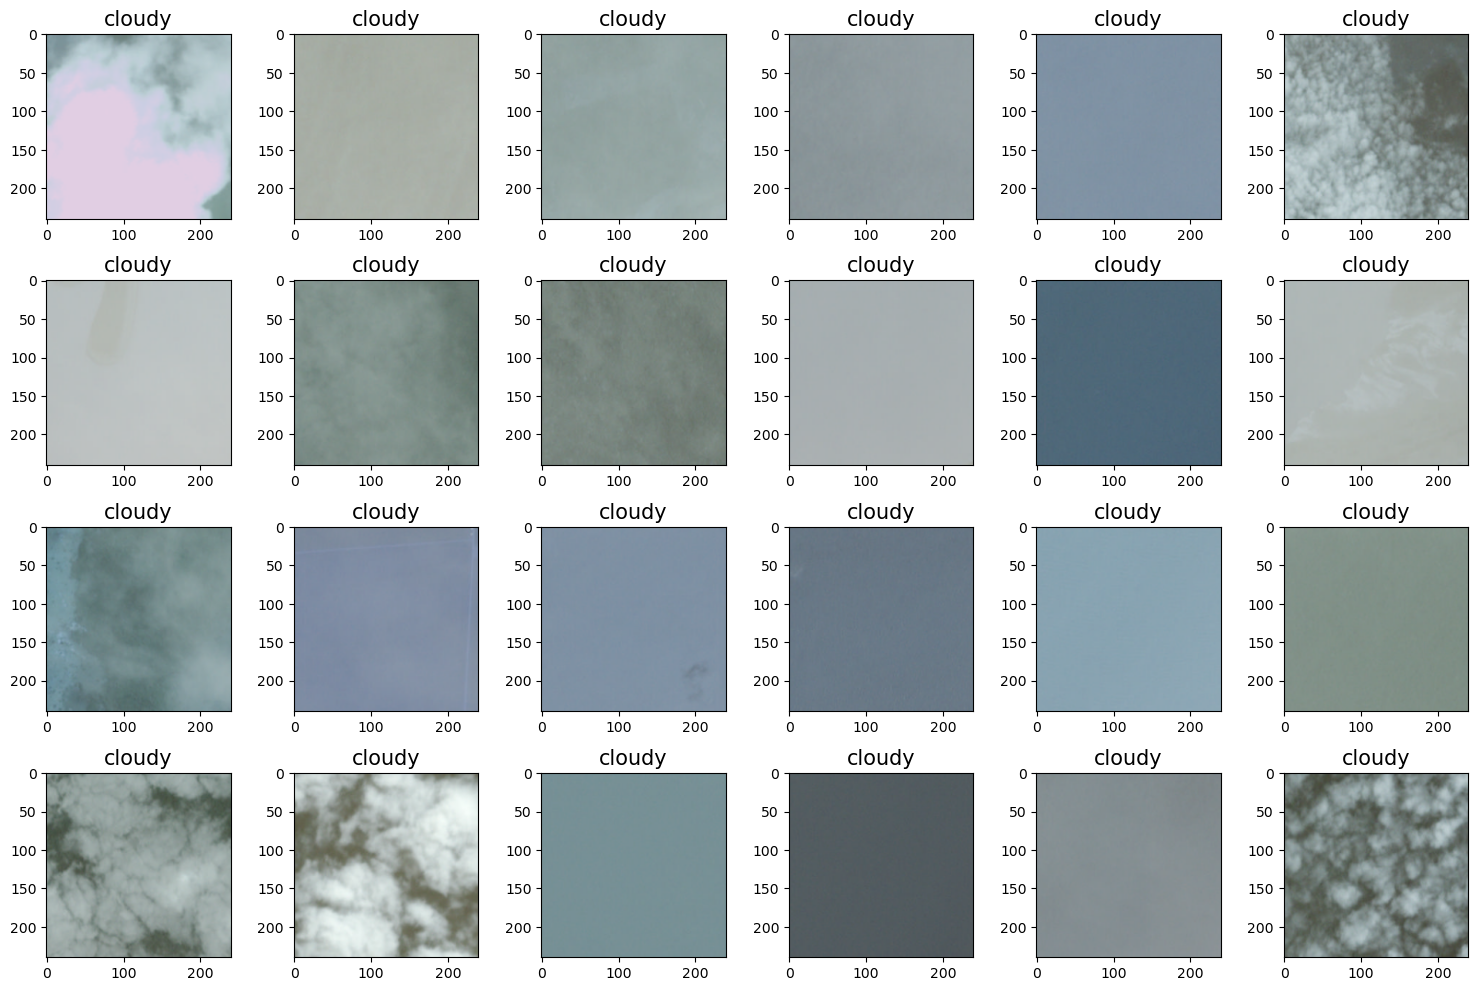

In [10]:
plt.figure(figsize=(15,10), facecolor='white')
for i in range(24):
    plt.subplot(4,6,i+1)
    img = cv2.imread(r"C:\Users\Prathamesh\Downloads\archive(12)\data\cloudy" + '/' + cloudy[i])
    resize_img = cv2.resize(img,(240,240))
    plt.imshow(resize_img)
    plt.title("cloudy",fontsize=15)
plt.tight_layout()

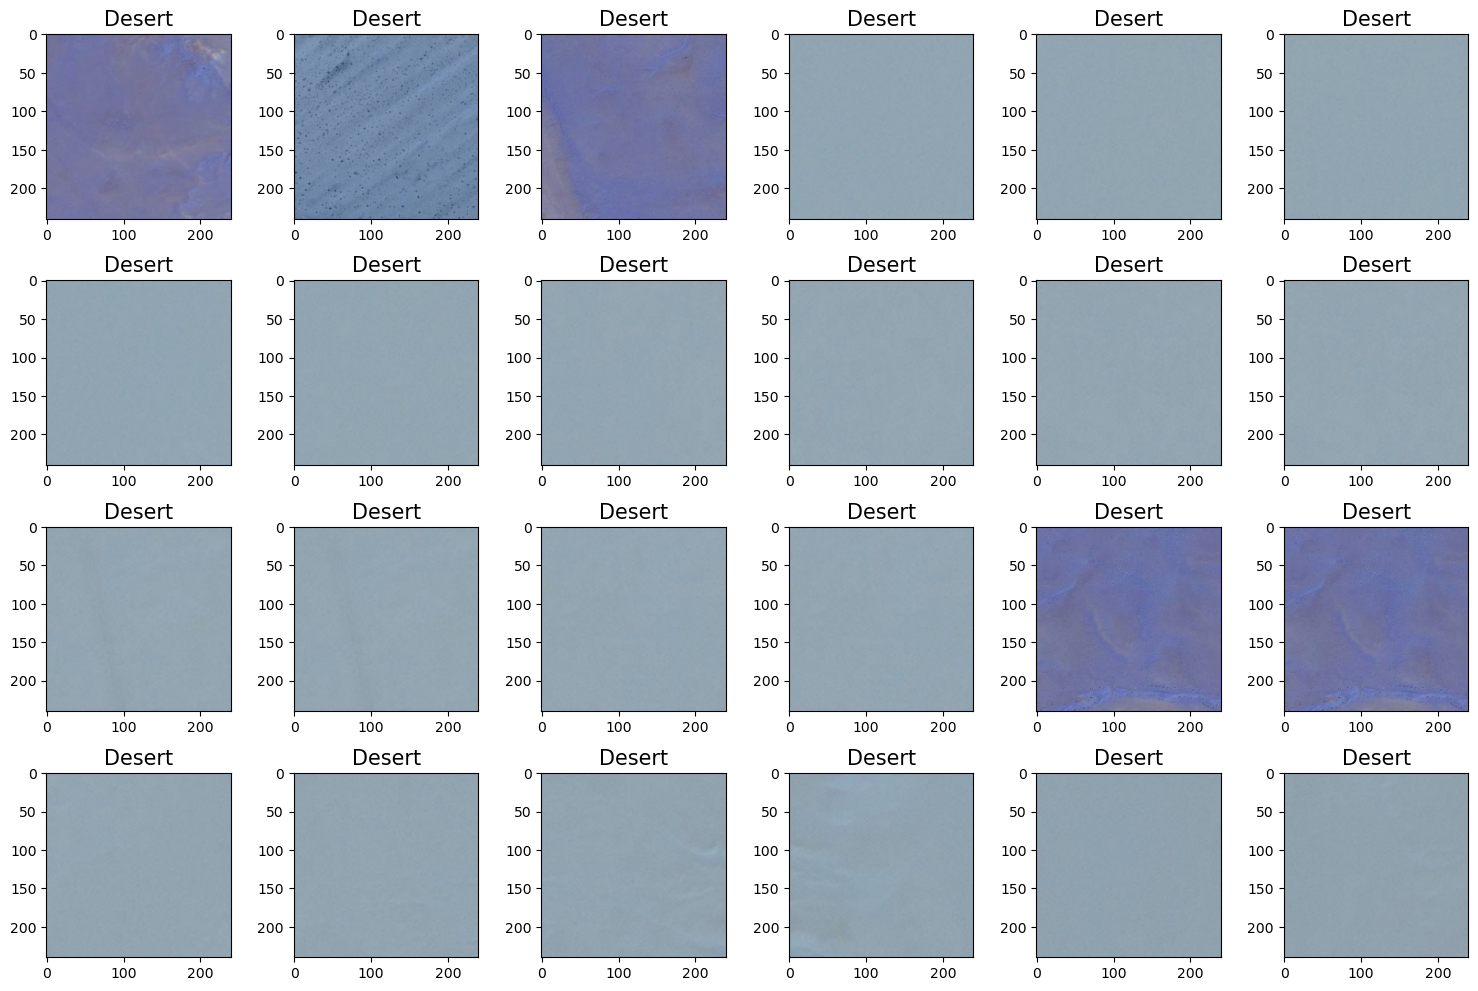

In [11]:

plt.figure(figsize=(15,10))
for j in range(24):
    plt.subplot(4,6,j+1)
    img = cv2.imread(r"C:\Users\Prathamesh\Downloads\archive(12)\data\desert" + '/' + desert[j])
    resize = cv2.resize(img, (240,240))
    plt.imshow(resize)
    plt.title("Desert",fontsize=15)
plt.tight_layout()

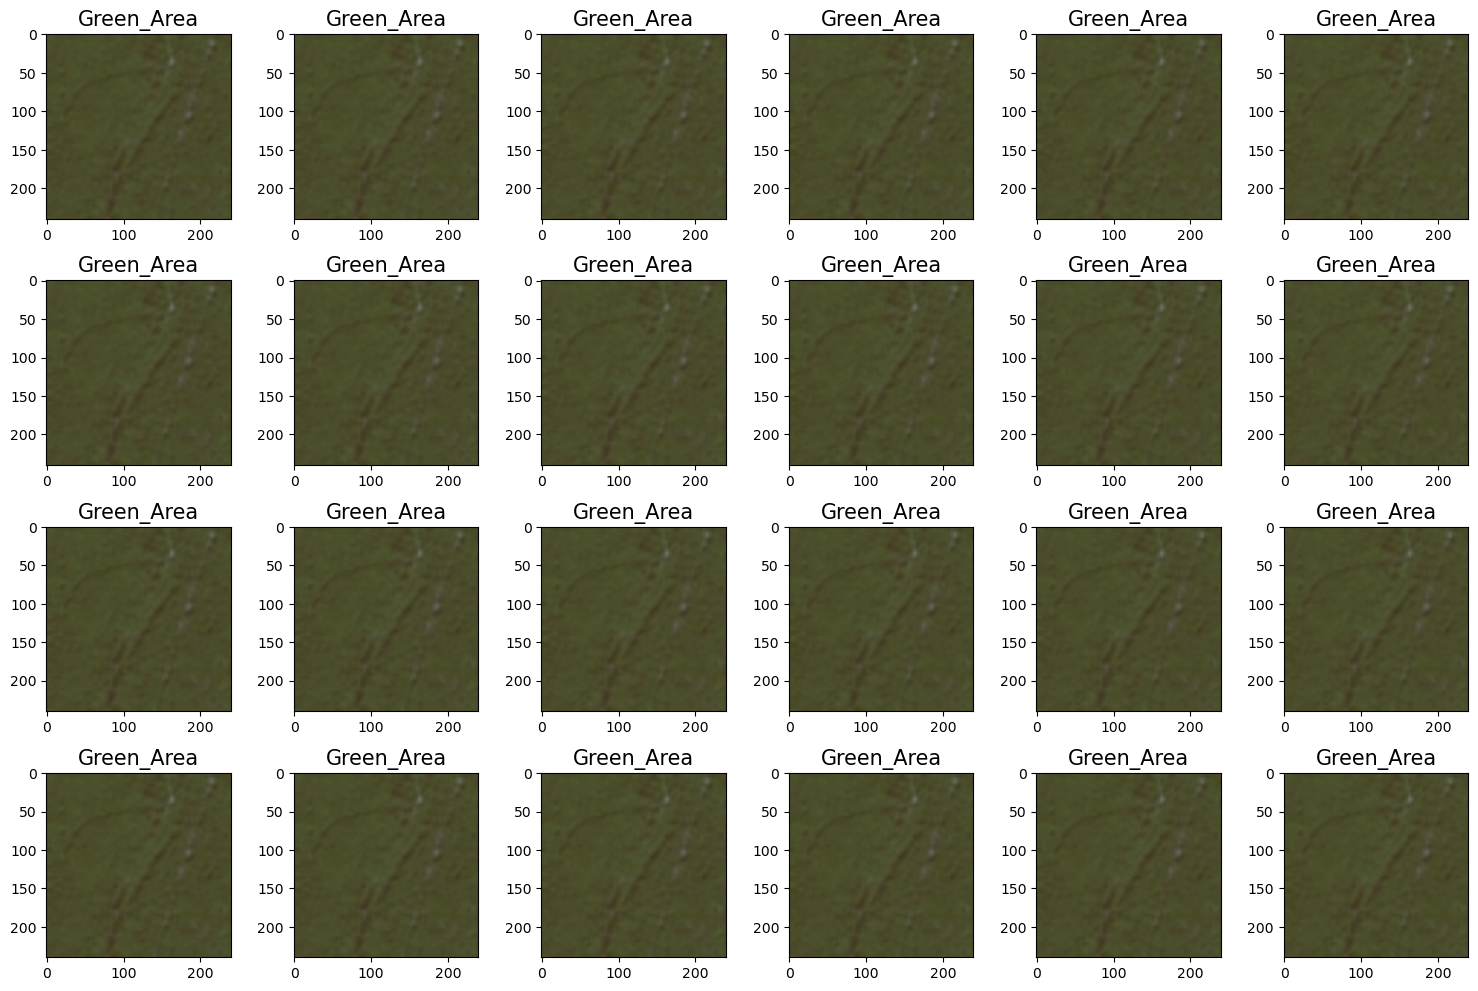

In [12]:

plt.figure(figsize=(15,10))
for k in range(24):
    plt.subplot(4,6,k+1)
    img = cv2.imread(r"C:\Users\Prathamesh\Downloads\archive(12)\data\green_area" + '/' + green_area[i])
    resize = cv2.resize(img, (240,240))
    plt.imshow(resize)
    plt.title("Green_Area",fontsize=15)
plt.tight_layout()

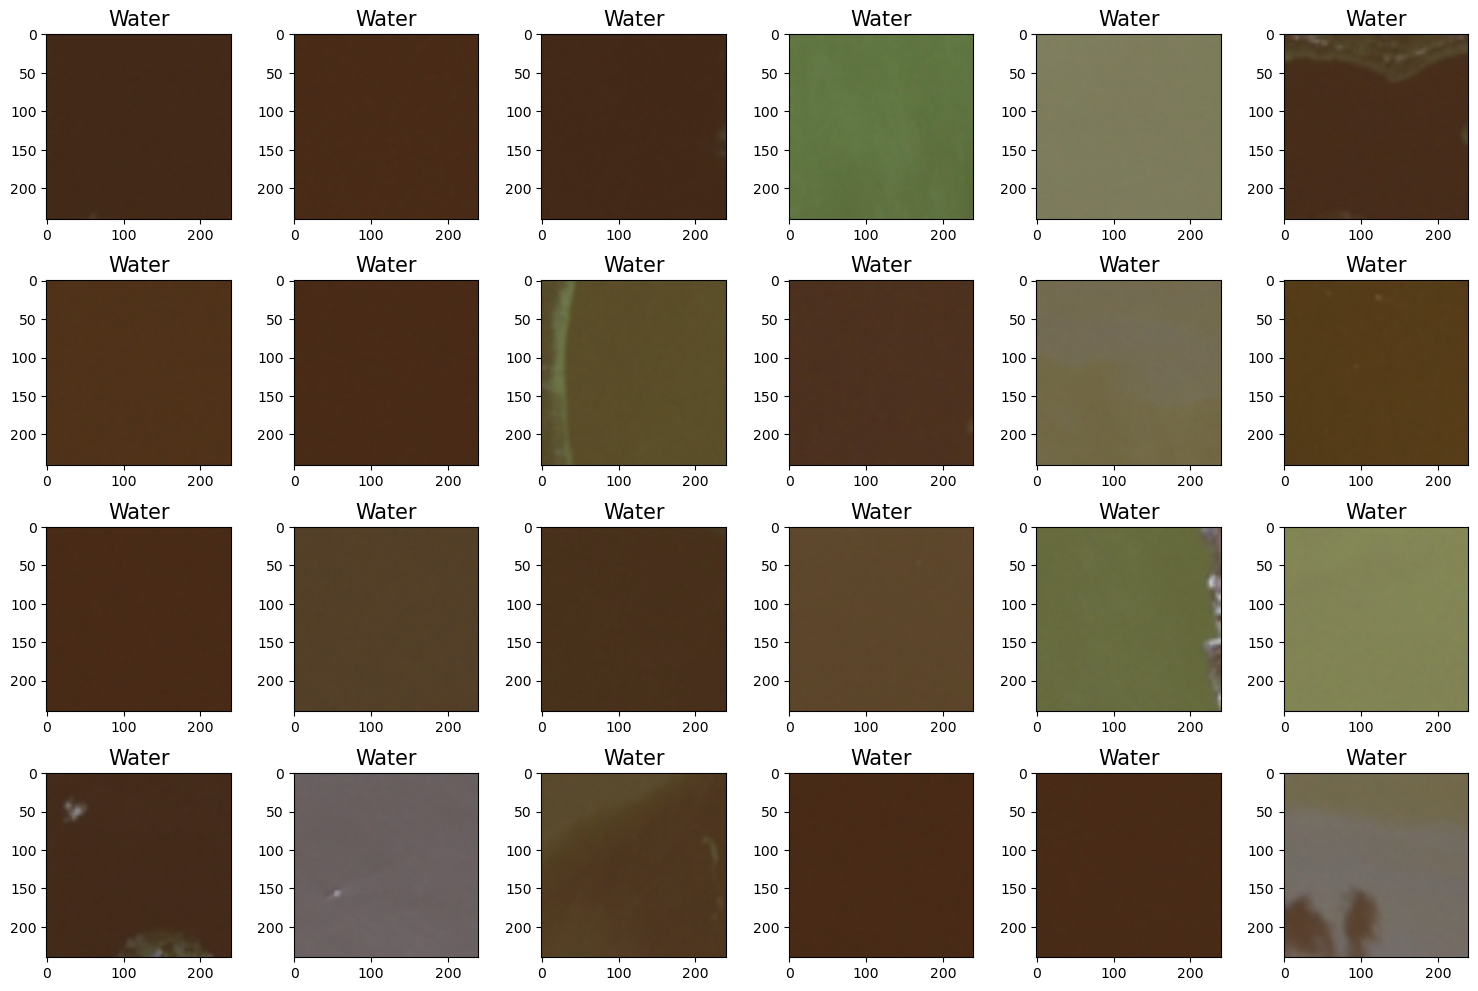

In [13]:

plt.figure(figsize=(15,10))
for l in range(24):
    plt.subplot(4,6,l+1)
    img = cv2.imread(r"C:\Users\Prathamesh\Downloads\archive(12)\data\water" + '/' + water[l])
    resize = cv2.resize(img, (240,240))
    plt.imshow(resize)
    plt.title("Water",fontsize=15)
plt.tight_layout()

In [14]:
from tensorflow.keras import layers, datasets,models
ann_model=models.Sequential([
    layers.Flatten(input_shape=(240,240,3)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(500,activation='relu'),
    layers.Dense(4,activation='softmax')])

In [15]:
# Define MobileNet with input shape
backbone = tf.keras.applications.MobileNet(input_shape=(240, 240, 3), include_top=False, weights='imagenet')
model1 = tf.keras.Sequential([
    backbone,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [16]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 172800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │   172,801,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,303,504 (661.10 MB)

 Trainable params: 173,303,504 (661.10 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model1.summary()    

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [18]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
ann_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
class_weights = dict(zip(np.unique(y_train),class_weights))
class_weights

{0: 0.9607508532423208,
 1: 1.2455752212389382,
 2: 0.9259868421052632,
 3: 0.929042904290429}

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
callback = ModelCheckpoint(filepath='cnn_model.keras', save_best_only=True, monitor='val_loss',verbose=1)

history1 = model1.fit(X_train,y_train, epochs=3,
                    class_weight=class_weights,
                    validation_data=(X_test,y_test),
                    verbose=1,callbacks=callback)

Epoch 1/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9143 - loss: 0.2791
Epoch 1: val_loss improved from inf to 13.43680, saving model to cnn_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.9145 - loss: 0.2783 - val_accuracy: 0.3718 - val_loss: 13.4368
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9770 - loss: 0.0705
Epoch 2: val_loss improved from 13.43680 to 1.27638, saving model to cnn_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 406s 3s/step - accuracy: 0.9771 - loss: 0.0704 - val_accuracy: 0.9051 - val_loss: 1.2764
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9925 - loss: 0.0245
Epoch 3: val_loss improved from 1.27638 to 0.75416, saving model to cnn_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.8980 - val_loss: 0.7542


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath='cnn_model.keras', save_best_only=True, monitor='val_loss',verbose=1)

history2 = ann_model.fit(X_train,y_train, epochs=3,
                    class_weight=class_weights,
                    validation_data=(X_test,y_test),
                    verbose=1,callbacks=callback)

Epoch 1/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4720 - loss: 47.9828
Epoch 1: val_loss improved from inf to 1.34317, saving model to cnn_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.4730 - loss: 47.7648 - val_accuracy: 0.7320 - val_loss: 1.3432
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7354 - loss: 1.3020
Epoch 2: val_loss improved from 1.34317 to 0.49336, saving model to cnn_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.7354 - loss: 1.3009 - val_accuracy: 0.8234 - val_loss: 0.4934
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7743 - loss: 0.6093
Epoch 3: val_loss did not improve from 0.49336
141/141 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7743 - loss: 0.6095 - val_accuracy: 0.7728 - val_loss: 0.6120


In [23]:
result = model1.evaluate(X_test,y_test)
print("The Current Model Achieved An Accuracy Of {}%".format(round(result[1]*100,2)))

36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 560ms/step - accuracy: 0.8868 - loss: 0.8258
The Current Model Achieved An Accuracy Of 89.8%


In [24]:
result = ann_model.evaluate(X_test,y_test)
print("The Current Model Achieved An Accuracy Of {}%".format(round(result[1]*100,2)))

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7660 - loss: 0.6791
The Current Model Achieved An Accuracy Of 77.28%


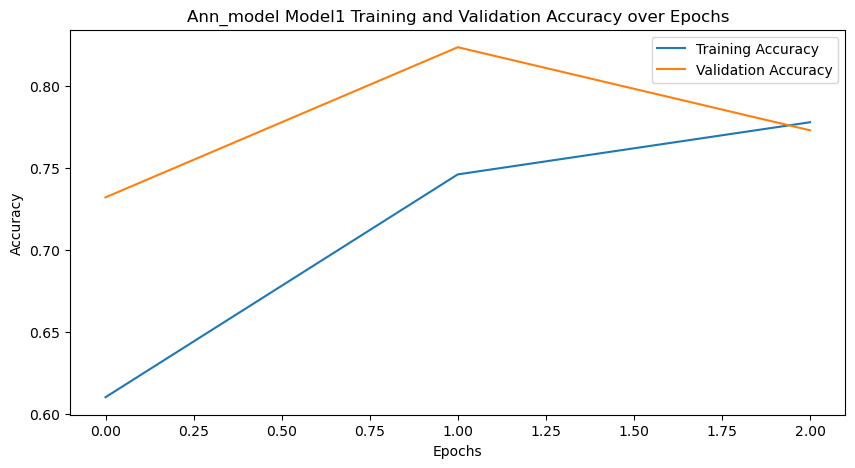

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Ann_model Model1 Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

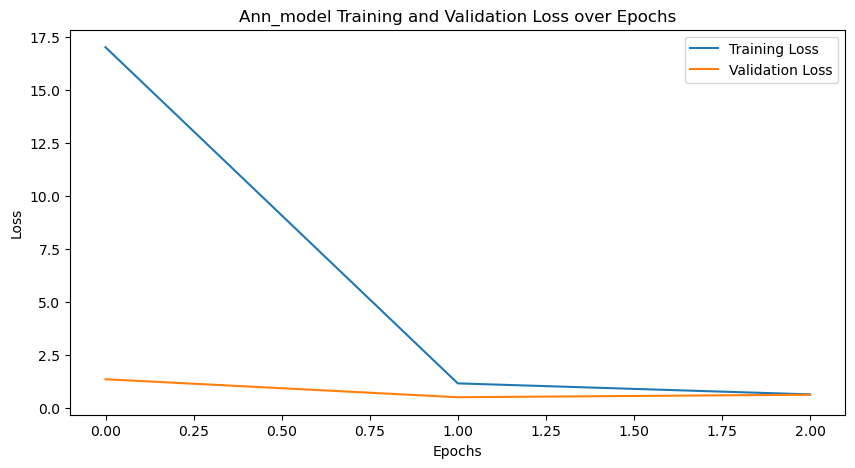

In [26]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Ann_model Training and Validation Loss over Epochs')
plt.legend()
plt.show()

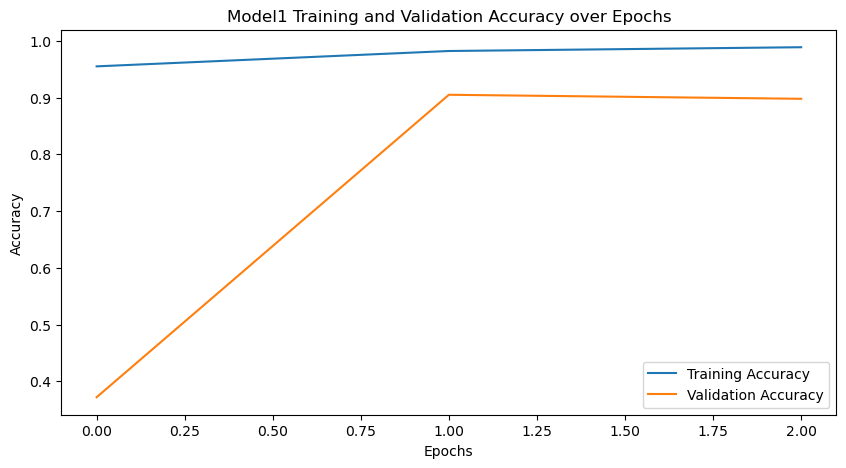

In [27]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model1 Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

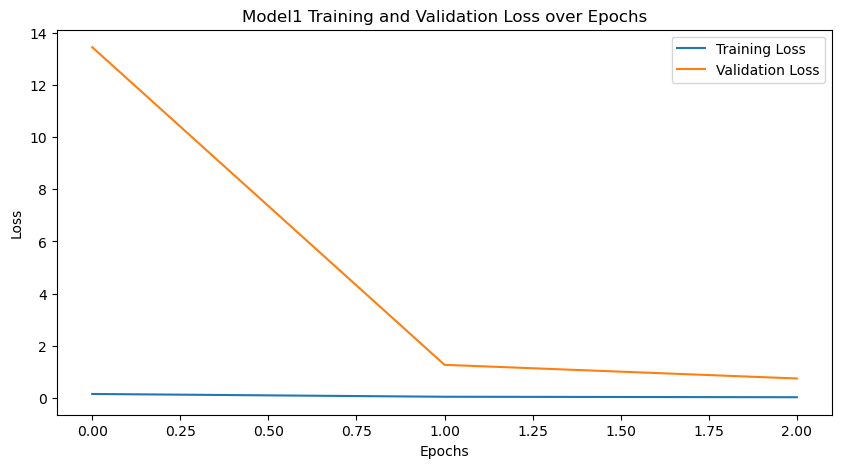

In [28]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model1 Training and Validation Loss over Epochs')
plt.legend()
plt.show()